In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_excel('RE_Data.xlsx')

In [3]:
df = df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1)

In [60]:
# Shuffle the DataFrame
df_shuff = df[0:50_000]

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
var_columns = [c for c in df_shuff if c not in ['ph','ph_labels','c4','c3']]

X = df_shuff.loc[:,var_columns].values
y = df_shuff.loc[:,'ph_labels'].values

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

In [64]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# Create the model
model = KNeighborsClassifier(weights= 'uniform', n_neighbors= 5, metric='minkowski')

# Use the KFold function to split the data into 5 folds
kf = KFold(n_splits=5)

# Use the cross_val_score function to calculate the accuracy scores for each fold
accuracies_train = cross_val_score(model, X_train, y_train, cv=kf)
# Use the cross_val_score function to calculate the accuracy scores for each fold
accuracies_test = cross_val_score(model, X_test, y_test, cv=kf)
# Calculate the mean accuracy score across all the folds
mean_accuracy_train = accuracies_train.mean()
mean_accuracy_test = accuracies_test.mean()
print(f"Mean accuracy_train: {mean_accuracy_train:.3f}")
print(f"Mean accuracy_test: {mean_accuracy_test:.3f}")


Mean accuracy_train: 0.924
Mean accuracy_test: 0.905


In [9]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix

# Assuming X and y are your data and labels, and clf is your classifier object
kf = KFold(n_splits=5)
y_pred = cross_val_predict(model, X_test, y_test, cv=kf)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

[[3719   99    0    0]
 [ 189 3276  236    0]
 [   0  392 3019  308]
 [   0    0  198 3564]]


Text(0.5, 1.0, 'Confusion Matrix ($f_3$)')

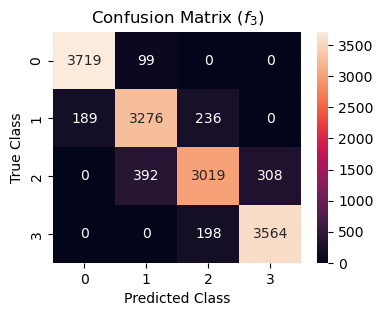

In [12]:
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

plt.figure(figsize=(4,3))

sns.heatmap(cm, annot=True, fmt='d')

# Add labels to the plot
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix ($f_3$)')

# plt.savefig('con_f1.jpeg',dpi=300)

In [10]:
import pickle

# Train your machine learning model and save it to a variable named 'model'

# Save the model to a file named 'model.pkl'
with open('KNN_3_1', 'wb') as file:
    pickle.dump(model, file)

In [9]:
datasize_tr = np.array([700,6500,7000,10500,14000,17500,21000,24500,28000,31500,35000])
datasize_vl = np.array([300,1500,3000,4500,6000,7500,9000,10500,12000,13500,15000])

{'weights': 'uniform', 'p': 2, 'n_neighbors': 5}

In [70]:
model.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=7, p=1)

In [11]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix

# Assuming X and y are your data and labels, and clf is your classifier object
kf = KFold(n_splits=5)
y_pred = cross_val_predict(model, X_test, y_test, cv=kf)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

[[3719   99    0    0]
 [ 189 3276  236    0]
 [   0  392 3019  308]
 [   0    0  198 3564]]


Text(0.5, 1.0, 'Confusion Matrix ($f_1$)')

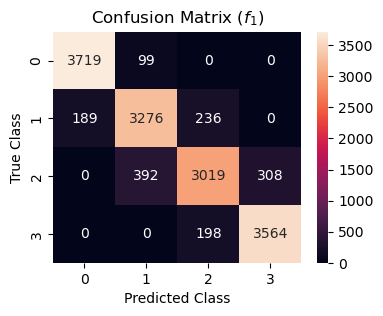

In [12]:
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

plt.figure(figsize=(4,3))

sns.heatmap(cm, annot=True, fmt='d')

# Add labels to the plot
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix ($f_1$)')

# plt.savefig('con_f1.jpeg',dpi=300)

In [71]:
import pickle

# Train your machine learning model and save it to a variable named 'model'

# Save the model to a file named 'model.pkl'
with open('KNN_2_1_regressor', 'wb') as file:
    pickle.dump(model, file)

In [70]:
datasize_tr = np.array([700,6500,7000,10500,14000,17500,21000,24500,28000,31500,35000])
datasize_vl = np.array([300,1500,3000,4500,6000,7500,9000,10500,12000,13500,15000])